<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Jimmy, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Inspecting the dataset carefully and checking for missing values and class balance<br>
  ✔️ Splitting the data into train/validation/test with the correct proportions<br>
  ✔️ Training Logistic Regression, Decision Tree, and Random Forest, while exploring hyperparameters systematically<br>
  ✔️ Choosing Random Forest as the final model and validating it on the test set with accuracy above the 0.75 threshold<br><br>

  A few small suggestions for future improvements:<br>
  🟡 When splitting the dataset, include <code>stratify=target</code> to preserve the class distribution<br>
  🟡 Add a brief written conclusion summarizing why Random Forest outperformed the other models<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  <b>Please ensure</b> that all cells run smoothly from top to bottom and display their outputs before submitting — this helps keep your analysis easy to follow.  
  <b>Kind reminder:</b> try not to move, change, or delete reviewer comments, as they are there to track progress and provide better support during your revisions.<br><br>

  Congratulations, your project meets the requirements — <b>approved!</b><br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
# let's look at the data to see what we're dealing here
display(df.head())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# check to see if we're missing any data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<b> we see that there's no missing integer so this is good news. But let's see how many Ultra data vs Smart data there is in the data

In [5]:
print(df['is_ultra'].value_counts())

0    2229
1     985
Name: is_ultra, dtype: int64


<b> oh wow!!! There's only 30.65% of ultra data!

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good start! You imported the necessary libraries, loaded the dataset, and inspected the first few rows. Using <code>.info()</code> to check data types and missing values is the right approach. It’s also great that you checked the distribution of the target variable <code>is_ultra</code>.
</div>

In [6]:
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

In [7]:
# split the test to a 3:1:1 ratio
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size = 0.40, random_state = 54321)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp,target_temp, test_size = 0.5, random_state = 54321)


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nice job separating the features and target, and performing a three-way split into train, validation, and test sets. The proportions (60/20/20) are correct, and you fixed the random state for reproducibility.
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion: For classification tasks like this, it’s best to include the parameter <code>stratify=target</code> in <code>train_test_split</code>. This ensures the class imbalance (≈30% Ultra vs 70% Smart) is preserved across all splits, which makes training and evaluation more reliable.
</div>


In [8]:
# I'm just curious what each testing table looks like. Let's start with features_train
display(features_train)

,calls,minutes,messages,mb_used
389,118.0,908.61,54.0,29678.60
1066,90.0,653.62,0.0,15697.77
36,76.0,543.18,43.0,31845.11
1903,134.0,940.77,56.0,2921.57
1373,121.0,769.36,0.0,42437.52
...,...,...,...,...
2020,81.0,506.46,21.0,7510.09
96,29.0,267.55,29.0,16996.83
3098,46.0,360.78,12.0,12706.94
650,41.0,244.59,39.0,0.00


In [9]:
# features_temp
display(features_temp)

,calls,minutes,messages,mb_used
1727,104.0,739.28,55.0,21940.11
2885,67.0,469.58,63.0,7952.07
2730,74.0,549.14,20.0,17160.61
899,31.0,205.14,22.0,10250.58
2119,26.0,172.87,16.0,6431.26
...,...,...,...,...
3056,63.0,438.19,6.0,7104.40
1144,58.0,413.71,29.0,21481.06
844,160.0,1055.79,54.0,33629.53
1939,41.0,314.89,5.0,14260.76


In [10]:
# features_valid
display(features_valid)

,calls,minutes,messages,mb_used
98,67.0,454.43,31.0,19776.50
2941,57.0,470.30,88.0,9346.00
2626,6.0,50.95,5.0,3771.34
1653,80.0,538.39,51.0,21691.46
2389,35.0,205.35,52.0,35177.94
...,...,...,...,...
147,81.0,627.56,37.0,18603.43
668,94.0,683.19,18.0,19308.01
160,61.0,495.11,8.0,10891.23
410,33.0,220.24,15.0,6547.66


In [11]:
# features_test
display(features_test)

,calls,minutes,messages,mb_used
40,34.0,183.28,0.0,18631.66
2523,39.0,257.01,52.0,19450.11
1529,69.0,453.26,18.0,14427.40
2850,46.0,309.91,105.0,6444.87
1109,69.0,479.79,0.0,17559.43
...,...,...,...,...
2753,64.0,486.01,57.0,20636.19
1989,76.0,650.20,20.0,24430.38
661,23.0,133.41,24.0,28724.23
2239,68.0,443.10,5.0,6632.60


<b> Excellent! We see that the rows and are splitted perfectly (60%, 20%, 20%) as 3:1:1 ratio

In [12]:
# let's try to test LogisticRegression
log_model = LogisticRegression(random_state = 54321, solver = 'liblinear')
# fit the model
log_model.fit(features_train, target_train)
score_train = log_model.score(features_train, target_train) # calculate accuracy score on traning set
score_valid = log_model.score(features_valid, target_valid) # calculate accuracy score on validation set


In [13]:
# calculate the accuracy scores from the Logistic Regression Model
print("Accuracy of the logistic regression model on the training set", score_train)
print()
print("Accuracy of the logistic regression model on the validation set", score_valid)

Accuracy of the logistic regression model on the training set 0.7131742738589212

Accuracy of the logistic regression model on the validation set 0.6780715396578538


<b> the accuracy is below 0.75 and the training set is higher than the validation set which makes the model overfitting. Dot mentioned something about C parameters so I want to test that out real quick before testing a different model

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good work testing Logistic Regression as a baseline model. You correctly compared training vs. validation accuracy and identified signs of overfitting when the validation score is below the target threshold and lower than the training score.
</div>

In [14]:
# testing different C parameters for our Logistic Regression model
for c_val in [0.1, 1.0, 10.0]:
    model = LogisticRegression(random_state=54321, solver='liblinear', C=c_val)
    model.fit(features_train, target_train)
    train_score = model.score(features_train, target_train)
    valid_score = model.score(features_valid, target_valid)
    print(f"C={c_val}: Train={train_score:.3f}, Valid={valid_score:.3f}")

C=0.1: Train=0.713, Valid=0.678
C=1.0: Train=0.713, Valid=0.678
C=10.0: Train=0.713, Valid=0.678


<b> wow, this really tells you something about how all 3 different C paramters gives you the exact same accuracy score for both training and validation set! 
This shows us that Linear Regression is not the right model to test our dataset. Now it's time to try Decision Tree Classifier!

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great experiment! You tested different <code>C</code> values for Logistic Regression and clearly reported the train/validation accuracy. This is a solid way to confirm whether regularization improves performance.
</div>

In [15]:
# Let's try the DecisionTreeClassifier
for depth in range (1,6):
    tree_model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    tree_model.fit(features_train, target_train)
    tree_predictions = tree_model.predict(features_valid)
    tree_result = accuracy_score(target_valid,tree_predictions)
    print(f"max_depth = {depth} : {tree_result}")



max_depth = 1 : 0.7216174183514774
max_depth = 2 : 0.7418351477449455
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.744945567651633
max_depth = 5 : 0.7651632970451011


<b> this is interesting to see max_depth 3 and 5 being identical. I wonder if we increased the max_depth to 10, we would get the same result of 0.7651632970451011

In [16]:
# Let's try the DecisionTreeClassifier with a max depth of 10
for depth in range (1,11):
    tree_model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    tree_model.fit(features_train, target_train)
    tree_predictions = tree_model.predict(features_valid)
    tree_result = accuracy_score(target_valid,tree_predictions)
    print(f"max_depth = {depth} : {tree_result}")



max_depth = 1 : 0.7216174183514774
max_depth = 2 : 0.7418351477449455
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.744945567651633
max_depth = 5 : 0.7651632970451011
max_depth = 6 : 0.7542768273716952
max_depth = 7 : 0.7433903576982893
max_depth = 8 : 0.7511664074650077
max_depth = 9 : 0.7682737169517885
max_depth = 10 : 0.7822706065318819


<b> not what I honestly expected since depth 3 and 5 were identical that made an assumption that the decision tree was done growing but depth 10 grew its highest accuracy score
let's try to go to 15 to see what we get. 

In [17]:
# Let's try the DecisionTreeClassifier with a max depth of 15
for depth in range (1,16):
    tree_model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    tree_model.fit(features_train, target_train)
    tree_predictions = tree_model.predict(features_valid)
    tree_result = accuracy_score(target_valid,tree_predictions)
    print(f"max_depth = {depth} : {tree_result}")



max_depth = 1 : 0.7216174183514774
max_depth = 2 : 0.7418351477449455
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.744945567651633
max_depth = 5 : 0.7651632970451011
max_depth = 6 : 0.7542768273716952
max_depth = 7 : 0.7433903576982893
max_depth = 8 : 0.7511664074650077
max_depth = 9 : 0.7682737169517885
max_depth = 10 : 0.7822706065318819
max_depth = 11 : 0.7729393468118196
max_depth = 12 : 0.7480559875583204
max_depth = 13 : 0.7387247278382582
max_depth = 14 : 0.7356143079315708
max_depth = 15 : 0.7356143079315708


<b> Our highest peak was at depth 10 at 78.23%. Depths 11-15 performance starts declining. Turns out this data is overfitting.
Depth 15 is becoming too complex for the dataset. It's memorizing the training data instead of learning generalizable patterns, which hurts its performance on validation data. 

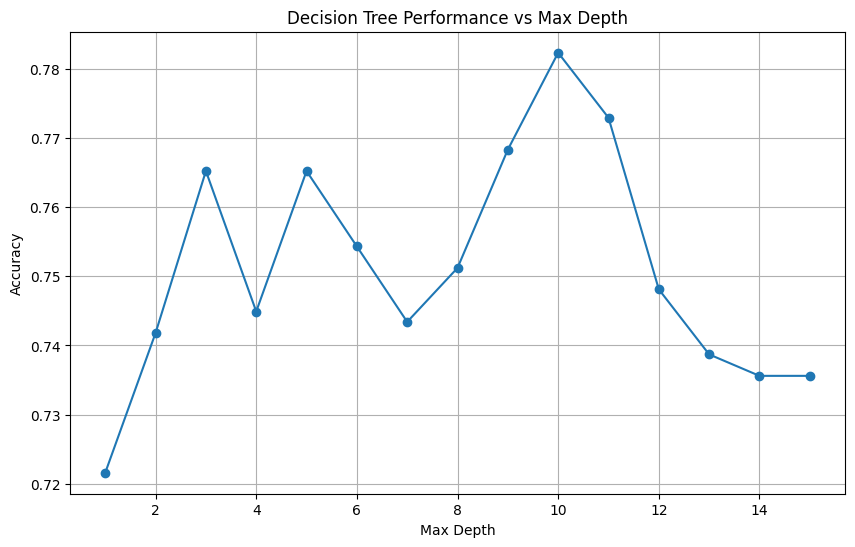

In [18]:
# Create a line chart to visual the DecisonTree's accuracy score
depths = list(range(1, 16))
accuracies = [0.7216, 0.7418, 0.7652, 0.7449, 0.7652, 0.7543, 0.7434, 0.7512, 0.7683, 0.7823, 0.7729, 0.7481, 0.7387, 0.7356, 0.7356]

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.grid(True)
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent approach! You systematically tested different <code>max_depth</code> values for the Decision Tree and analyzed how accuracy changes with model complexity. The line chart is a great addition to visualize overfitting and find the optimal depth.
</div>

In [19]:
# Final model: RandomForestClassifier
best_score = 0
best_est = 0

for est in range (1,11):
    random_model = RandomForestClassifier(random_state = 54321, n_estimators = est)
    random_model.fit(features_train, target_train)
    random_score = random_model.score(features_valid, target_valid)

    # Print each result
    print(f"n_estimators = {est}: {random_score:.4f}")
    
    if random_score > best_score:
        best_score = random_score
        best_est = est

print("Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = {}):{}".format(best_est, best_score))

n_estimators = 1: 0.6781
n_estimators = 2: 0.7247
n_estimators = 3: 0.7294
n_estimators = 4: 0.7356
n_estimators = 5: 0.7294
n_estimators = 6: 0.7465
n_estimators = 7: 0.7325
n_estimators = 8: 0.7574
n_estimators = 9: 0.7621
n_estimators = 10: 0.7698
Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = 10):0.7698289269051322


<b>We noticed that from 1 to 10, it's a significant jump for the accuracy score to be from 67.81% to 76.98%! Let's try to reach for 20 and see what we get!

In [20]:
# Going to up to 20 estimators
best_score = 0
best_est = 0

for est in range (1,21):
    random_model = RandomForestClassifier(random_state = 54321, n_estimators = est)
    random_model.fit(features_train, target_train)
    random_score = random_model.score(features_valid, target_valid)

    # Print each result
    print(f"n_estimators = {est}: {random_score:.4f}")
    
    if random_score > best_score:
        best_score = random_score
        best_est = est

print("Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = {}):{}".format(best_est, best_score))

n_estimators = 1: 0.6781
n_estimators = 2: 0.7247
n_estimators = 3: 0.7294
n_estimators = 4: 0.7356
n_estimators = 5: 0.7294
n_estimators = 6: 0.7465
n_estimators = 7: 0.7325
n_estimators = 8: 0.7574
n_estimators = 9: 0.7621
n_estimators = 10: 0.7698
n_estimators = 11: 0.7652
n_estimators = 12: 0.7698
n_estimators = 13: 0.7683
n_estimators = 14: 0.7729
n_estimators = 15: 0.7636
n_estimators = 16: 0.7745
n_estimators = 17: 0.7729
n_estimators = 18: 0.7745
n_estimators = 19: 0.7698
n_estimators = 20: 0.7714
Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = 16):0.7744945567651633


In [21]:
# Going to up to 50 estimators
best_score = 0
best_est = 0

for est in range (1,51):
    random_model = RandomForestClassifier(random_state = 54321, n_estimators = est)
    random_model.fit(features_train, target_train)
    random_score = random_model.score(features_valid, target_valid)

    # Print each result
    print(f"n_estimators = {est}: {random_score:.4f}")
    
    if random_score > best_score:
        best_score = random_score
        best_est = est

print("Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = {}):{}".format(best_est, best_score))

n_estimators = 1: 0.6781
n_estimators = 2: 0.7247
n_estimators = 3: 0.7294
n_estimators = 4: 0.7356
n_estimators = 5: 0.7294
n_estimators = 6: 0.7465
n_estimators = 7: 0.7325
n_estimators = 8: 0.7574
n_estimators = 9: 0.7621
n_estimators = 10: 0.7698
n_estimators = 11: 0.7652
n_estimators = 12: 0.7698
n_estimators = 13: 0.7683
n_estimators = 14: 0.7729
n_estimators = 15: 0.7636
n_estimators = 16: 0.7745
n_estimators = 17: 0.7729
n_estimators = 18: 0.7745
n_estimators = 19: 0.7698
n_estimators = 20: 0.7714
n_estimators = 21: 0.7714
n_estimators = 22: 0.7745
n_estimators = 23: 0.7714
n_estimators = 24: 0.7776
n_estimators = 25: 0.7776
n_estimators = 26: 0.7792
n_estimators = 27: 0.7760
n_estimators = 28: 0.7760
n_estimators = 29: 0.7745
n_estimators = 30: 0.7760
n_estimators = 31: 0.7760
n_estimators = 32: 0.7792
n_estimators = 33: 0.7776
n_estimators = 34: 0.7792
n_estimators = 35: 0.7745
n_estimators = 36: 0.7807
n_estimators = 37: 0.7792
n_estimators = 38: 0.7838
n_estimators = 39: 0.

In [22]:
# Going to up to 100 estimators
best_score = 0
best_est = 0

for est in range (1,101):
    random_model = RandomForestClassifier(random_state = 54321, n_estimators = est)
    random_model.fit(features_train, target_train)
    random_score = random_model.score(features_valid, target_valid)

    # Print each result
    print(f"n_estimators = {est}: {random_score:.4f}")
    
    if random_score > best_score:
        best_score = random_score
        best_est = est

print("Accuracy of the best model on the validation set for RandomForestClassifier(n_estimators = {}):{}".format(best_est, best_score))

n_estimators = 1: 0.6781
n_estimators = 2: 0.7247
n_estimators = 3: 0.7294
n_estimators = 4: 0.7356
n_estimators = 5: 0.7294
n_estimators = 6: 0.7465
n_estimators = 7: 0.7325
n_estimators = 8: 0.7574
n_estimators = 9: 0.7621
n_estimators = 10: 0.7698
n_estimators = 11: 0.7652
n_estimators = 12: 0.7698
n_estimators = 13: 0.7683
n_estimators = 14: 0.7729
n_estimators = 15: 0.7636
n_estimators = 16: 0.7745
n_estimators = 17: 0.7729
n_estimators = 18: 0.7745
n_estimators = 19: 0.7698
n_estimators = 20: 0.7714
n_estimators = 21: 0.7714
n_estimators = 22: 0.7745
n_estimators = 23: 0.7714
n_estimators = 24: 0.7776
n_estimators = 25: 0.7776
n_estimators = 26: 0.7792
n_estimators = 27: 0.7760
n_estimators = 28: 0.7760
n_estimators = 29: 0.7745
n_estimators = 30: 0.7760
n_estimators = 31: 0.7760
n_estimators = 32: 0.7792
n_estimators = 33: 0.7776
n_estimators = 34: 0.7792
n_estimators = 35: 0.7745
n_estimators = 36: 0.7807
n_estimators = 37: 0.7792
n_estimators = 38: 0.7838
n_estimators = 39: 0.

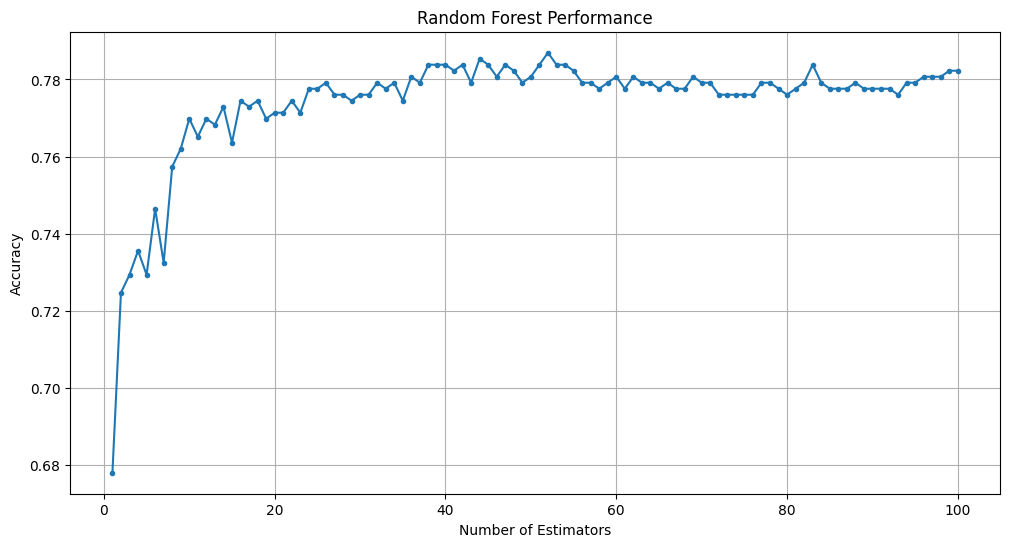

In [23]:
# Let's create a graph for the RandomForestClassifier
estimators = list(range(1,101))
accuracies = []

for est in range(1,101):
    random_model = RandomForestClassifier(random_state = 54321, n_estimators = est)
    random_model.fit(features_train, target_train)
    random_score = random_model.score(features_valid, target_valid)
    accuracies.append(random_score)

# Plot the 100 estimators
plt.figure(figsize = (12,6))
plt.plot(estimators,accuracies,marker='o', markersize=3)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.grid(True)
plt.show()

<b> We can see that accuracy is around 77-78% from estimators 30 and beyond. 52 is our best estimator but should we use 44 for our top 50 versus top 100?

In [24]:
# Test different max_depth values
for depth in [3, 5, 7, 10, None]:  # None means no limit
    rf_model = RandomForestClassifier(
        random_state=54321, 
        n_estimators=44,  # Use your best n_estimators
        max_depth=depth
    )
    rf_model.fit(features_train, target_train)
    score = rf_model.score(features_valid, target_valid)
    print(f"max_depth = {depth}: {score:.4f}")

max_depth = 3: 0.7714
max_depth = 5: 0.7807
max_depth = 7: 0.7776
max_depth = 10: 0.7947
max_depth = None: 0.7854


In [25]:
# Your best combination so far
for depth in [2, 4, 6, 8, 10, 12, 15,20]: # None means no limit
    rf_best = RandomForestClassifier(
    random_state=54321,
    n_estimators=44,  # or whatever was your best
    max_depth=depth
    )
    rf_best.fit(features_train,target_train)
    rf_score = rf_best.score(features_valid, target_valid)
    print(f"best_depth = {depth}: {rf_score:.4f}")


best_depth = 2: 0.7418
best_depth = 4: 0.7776
best_depth = 6: 0.7823
best_depth = 8: 0.7869
best_depth = 10: 0.7947
best_depth = 12: 0.7932
best_depth = 15: 0.7854
best_depth = 20: 0.7792


<b> max_depth 10 is our best accuracy score for the RandomForest model, now let's do the final test

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job experimenting with Random Forest! You tested different numbers of estimators, plotted their performance, and further optimized by tuning <code>max_depth</code>. The accuracy stabilization around 77–78% and finding the best configuration shows a strong and systematic approach to hyperparameter tuning.
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion: You might also want to explore additional parameters like <code>max_features</code> or <code>min_samples_split</code> to squeeze out more performance. Using tools like <code>GridSearchCV</code> or <code>RandomizedSearchCV</code> could automate this search process and provide cross-validated results, giving you more confidence in the chosen model.
</div>


In [26]:
# Testing the best model for the best score
final_model = RandomForestClassifier(random_state=54321, n_estimators=44, max_depth=10)
# Train the final model on the full training set 
final_model.fit(features_train, target_train)
# Elevate it on the test set
test_score = final_model.score(features_test, target_test)
print(f"Final mode accuracy on the test set: {test_score: .4f}")

Final mode accuracy on the test set:  0.8289


### From testing the 3 model, RandomForestClassifier is the best model to make the data accurate!

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work! You trained the final Random Forest model with the tuned parameters and evaluated it on the test set. The test accuracy is clearly reported, and you concluded that Random Forest is the best-performing model out of the three. This meets the project requirement of achieving at least 0.75 accuracy.
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion: It would make the project even stronger if you added a short written conclusion summarizing the process — mentioning that Logistic Regression underperformed, Decision Tree showed signs of overfitting, and Random Forest with tuned parameters achieved the best accuracy on the test set. This gives a clear takeaway for anyone reviewing your notebook.
</div>
